# Loading Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def obj_to_float(x):
    try:
        return(float(x))
    except:
        return(None)

def map_maker(col):
    ''' 
    col=col containing categorical features in str format
    output a dictionary where
    key=string, value=incrementing int value
    '''
    string_to_int={}
    for val,key in enumerate(set(col)):
        string_to_int[key]=val
    if(set(string_to_int.keys()).difference(set(['No','Yes']))==set()):    
        string_to_int['Yes']=1
        string_to_int['No']=0
    return(string_to_int) 

class data:
    def __init__(self,path):
        self.data=pd.read_csv(path)
        
        features,mappings=self.mk_features()
        self.features=features
        self.mappings=mappings
        return(None)
    
    def mk_features(self):
        features=self.data.copy()

        features=features.drop(labels='customerID',axis=1)
        
        features.TotalCharges=features.TotalCharges.apply(obj_to_float)
        
        obj_col=list(map(lambda x:features[x].dtype=='O',features.columns))
        categorical_mappings=features.iloc[:,obj_col].apply(map_maker,axis=0)
        for dictionary,colName in zip(categorical_mappings,features.iloc[:,obj_col].columns):
            features[colName]=features[colName].apply(lambda x:dictionary[x])
        return(features.dropna(),categorical_mappings)
    
churn=data('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data=churn.data
categorical_mappings=churn.mappings
features=churn.features

# Data Exploration

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,2,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,1,0,0,0,0,2,1,3,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,0,0,2,1,0,70.70,151.65,1


## Statistics

In [4]:
features.describe()[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.162400
std,24.545260,30.085974,2266.771362,0.368844
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


## Visualizations

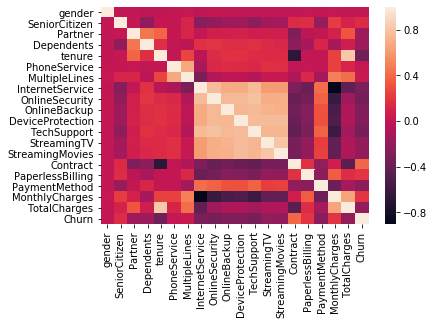

In [5]:
%matplotlib inline

sns.heatmap(features.corr())

In [6]:
features.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.010284,-0.009643,0.004365,0.002978,-0.004526,-0.000057,-0.000578,0.001339,0.000095,0.011902,-0.003499,0.013779,-0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.113769,-0.259030,-0.210546,-0.152380,-0.156700,-0.223438,-0.129721,-0.120658,0.141820,0.156258,-0.185740,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.118037,-0.000938,0.081078,0.086346,0.093391,0.068277,0.079066,0.075310,-0.294094,-0.013957,0.003478,0.097825,0.319072,-0.149982
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.019178,0.177789,0.188889,0.160845,0.154819,0.179176,0.138809,0.125086,-0.240556,-0.110131,0.119986,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.259112,-0.031272,0.147575,0.180896,0.180895,0.146727,0.138208,0.142143,-0.676734,0.004823,0.004593,0.246862,0.825880,-0.354049
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.674824,-0.094182,0.125544,0.149932,0.138938,0.123533,0.171773,0.164379,-0.003019,0.016696,-0.001393,0.248033,0.113008,0.011691
MultipleLines,0.010284,0.113769,0.118037,-0.019178,0.259112,0.674824,1.000000,-0.308546,-0.066695,-0.007500,-0.012819,-0.066814,0.030524,0.027944,-0.084037,0.133538,-0.132367,0.491412,0.412495,0.036148
InternetService,-0.009643,-0.259030,-0.000938,0.177789,-0.031272,-0.094182,-0.308546,1.000000,0.764510,0.685822,0.681857,0.760544,0.616993,0.619608,-0.288855,-0.377644,0.415728,-0.905389,-0.428212,-0.316350
OnlineSecurity,0.004365,-0.210546,0.081078,0.188889,0.147575,0.125544,-0.066695,0.764510,1.000000,0.751312,0.748684,0.790951,0.701526,0.704672,-0.389138,-0.333656,0.369694,-0.620532,-0.153234,-0.332443
OnlineBackup,0.002978,-0.152380,0.086346,0.160845,0.180896,0.149932,-0.007500,0.685822,0.751312,1.000000,0.740244,0.753752,0.720277,0.716388,-0.350419,-0.261565,0.308180,-0.537727,-0.085017,-0.291047


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

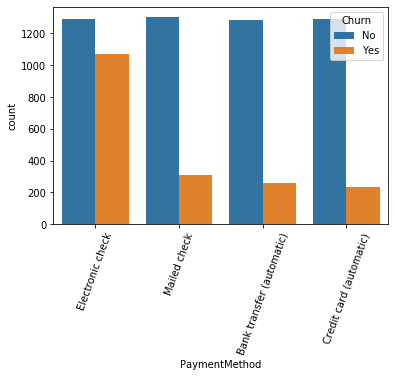

In [7]:

sns.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.xticks(rotation=70)

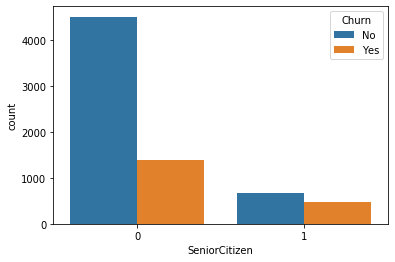

In [8]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)

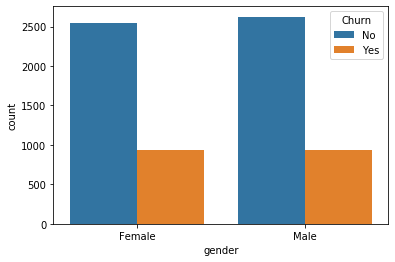

In [9]:
sns.countplot(x='gender',hue='Churn',data=data)

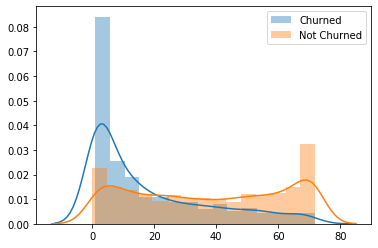

In [10]:
#tenure vs churn

nbin=15
sns.distplot(list(data[data.Churn=='Yes'].tenure),label='Churned',bins=nbin)
sns.distplot(list(data[data.Churn=='No'].tenure),label='Not Churned',bins=nbin)
plt.legend()

In [11]:
np.array(data[data.Churn=='Yes'].tenure)

array([ 2,  2,  8, ...,  1, 67,  4])

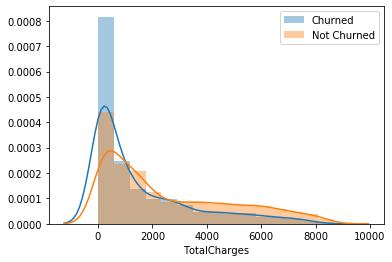

In [12]:
nbin=15
sns.distplot(features[features.Churn==1]['TotalCharges'],label='Churned',bins=nbin)
sns.distplot(features[features.Churn==0]['TotalCharges'],label='Not Churned',bins=nbin)
plt.legend()

# Models

In [13]:
n=.75
sample=features.sample(frac=1)
sample=sample.dropna()
train=sample.iloc[:int(sample.shape[0]*n),:]
test=sample.iloc[int(sample.shape[0]*n):,:]

In [14]:

logr=LogisticRegression(solver='lbfgs',max_iter=10**6)

logr.fit(train.iloc[:,:-1],train.Churn)
print(logr.score(train.iloc[:,:-1],train.Churn))
print(logr.score(test.iloc[:,:-1],test.Churn))

0.8024270003792188
0.810580204778157


In [15]:
rfc=RandomForestClassifier(n_estimators=10)

rfc.fit(train.iloc[:,:-1],train.Churn)
print(rfc.score(train.iloc[:,:-1],train.Churn))
print(rfc.score(test.iloc[:,:-1],test.Churn))

0.9806598407281001
0.79806598407281


In [16]:
from sklearn.model_selection import GridSearchCV
rfc_two=RandomForestClassifier(n_jobs=-1)
params={'n_estimators':range(5,101,2)
        ,'min_samples_split':[2]+list(np.linspace(0.1,0.5,9))
        ,'min_samples_leaf':[1]+list(np.linspace(0.1,0.5,9))
        ,'max_features':['auto']+list(np.linspace(0.1,0.9,10))
       }
models=GridSearchCV(rfc_two,params,cv=4,n_jobs=-1,verbose=1)
models.fit(train.iloc[:,:-1],train.Churn)
print(models.score(train.iloc[:,:-1],train.Churn))
print(models.score(test.iloc[:,:-1],test.Churn))

Fitting 4 folds for each of 52800 candidates, totalling 211200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

0.7946530147895335
0.8003412969283277


## Storing Model Response

In [17]:
train_input=train.iloc[:,:-1]
train_output=np.array(train.iloc[:,-1])

logr_output=logr.predict(train_input)
rfc_output=rfc.predict(train_input)

train_results=pd.DataFrame([train_input.index,train_output,logr_output,rfc_output]
                           ,['Index','Answer','Logistic','RandomForest']).T


train_results.to_csv('data/churn_train_results',index=False)
print('Training results saved!')

Training results saved!


In [18]:
test_input=test.iloc[:,:-1]
test_output=np.array(test.iloc[:,-1])

logr_output=logr.predict(test_input)
rfc_output=rfc.predict(test_input)

test_results=pd.DataFrame([test_input.index,test_output,logr_output,rfc_output]
                          ,['Index','Answer','Logistic','RandomForest']).T
test_results.to_csv('data/churn_test_results',index=False)
print('Test results saved!')

Test results saved!


# PCA

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
points=pca.fit_transform(sample)
pca.explained_variance_ratio_

array([9.9985979e-01, 1.2247977e-04])

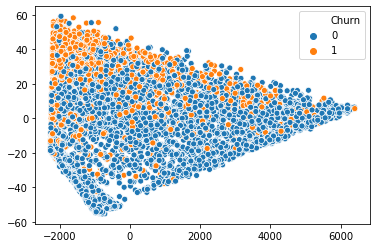

In [20]:
%matplotlib inline
plot=sns.scatterplot(x=points[:,0],y=points[:,1],hue=sample.Churn)

In [21]:
n=.8
train_X,train_y=points[:int(points.shape[0]*n),:],sample.Churn[:int(points.shape[0]*n)]
test_X,test_y=points[int(points.shape[0]*n):,:],sample.Churn[int(points.shape[0]*n):]
rfc=RandomForestClassifier(n_estimators=500,max_depth=3,max_features=.8,n_jobs=3)

rfc.fit(train_X,train_y)
print(rfc.score(train_X,train_y))
print(rfc.score(test_X,test_y))

0.7930666666666667
0.7995735607675906
